# Exercici 2.9. Anàlisi d’una plataforma de streaming de vídeo

Descripció dels fitxers (esquema)

videos.csv

video_id (int)

title (str)

genre (str)

duration_min (float)

publish_date (YYYY-MM-DD)

viewers.csv

viewer_id (int)

name (str)

age (int)

country (str)

subscription (str) — free o premium

views.csv

view_id (int)

viewer_id (int)

video_id (int)

watch_minutes (float)

view_date (YYYY-MM-DD HH:MM:SS)

completed (0/1) — si el vídeo es va veure completament

Llegir CSV i mostrar head().

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
videos_df = pd.read_csv('./data/videos.csv')
views_df = pd.read_csv('./data/views.csv')
viewers_df = pd.read_csv('./data/viewers.csv')
print("=== Videos DataFrame ===")
print(videos_df.head())
print("\n=== Views DataFrame ===")
print(views_df.head())
print("\n=== Viewers DataFrame ===")
print(viewers_df.head())

=== Videos DataFrame ===
   video_id    title   genre  duration_min publish_date
0         1  Video 1  Comedy            21   2020-01-01
1         2  Video 2  Sports            61   2020-01-02
2         3  Video 3  Sports            58   2020-01-03
3         4  Video 4  Sports            34   2020-01-04
4         5  Video 5  Sci-Fi            37   2020-01-05

=== Views DataFrame ===
   view_id  viewer_id  video_id  watch_minutes            view_date  completed
0        1       5593       114           8.00  2023-07-24 01:40:00          1
1        2       5363        59          10.26  2023-03-29 17:51:00          0
2        3       5576       224           2.60  2023-06-13 22:15:00          0
3        4       5470       137          39.68  2023-09-08 16:52:00          0
4        5       5069       213          18.90  2023-08-22 00:41:00          0

=== Viewers DataFrame ===
   viewer_id      name  age  country subscription
0       5000  Viewer 0   59  Germany      premium
1       5001 

Combinar a views_df (views join videos join viewers).

In [3]:
views_df = views_df.merge(videos_df, on='video_id', how='left')
views_df = views_df.merge(viewers_df, on='viewer_id', how='left')
views_df

,view_id,viewer_id,video_id,watch_minutes,view_date,completed,title_x,genre_x,duration_min_x,publish_date_x,...,country_x,subscription_x,title_y,genre_y,duration_min_y,publish_date_y,name_y,age_y,country_y,subscription_y
0,1,5593,114,8.00,2023-07-24 01:40:00,1,Video 114,Drama,8,2020-04-23,...,Italy,premium,Video 114,Drama,8,2020-04-23,Viewer 593,27,Italy,premium
1,2,5363,59,10.26,2023-03-29 17:51:00,0,Video 59,Sports,94,2020-02-28,...,Germany,free,Video 59,Sports,94,2020-02-28,Viewer 363,51,Germany,free
2,3,5576,224,2.60,2023-06-13 22:15:00,0,Video 224,Sports,18,2020-08-11,...,Italy,free,Video 224,Sports,18,2020-08-11,Viewer 576,29,Italy,free
3,4,5470,137,39.68,2023-09-08 16:52:00,0,Video 137,Drama,48,2020-05-16,...,Italy,free,Video 137,Drama,48,2020-05-16,Viewer 470,79,Italy,free
4,5,5069,213,18.90,2023-08-22 00:41:00,0,Video 213,Sports,30,2020-07-31,...,France,free,Video 213,Sports,30,2020-07-31,Viewer 69,37,France,free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,5640,6,2.44,2023-10-08 03:46:00,0,Video 6,Sports,115,2020-01-06,...,UK,premium,Video 6,Sports,115,2020-01-06,Viewer 640,67,UK,premium
4996,4997,5380,268,0.48,2023-04-26 21:34:00,0,Video 268,Documentary,5,2020-09-24,...,Spain,free,Video 268,Documentary,5,2020-09-24,Viewer 380,68,Spain,free
4997,4998,5150,230,6.16,2023-08-05 04:11:00,0,Video 230,Sci-Fi,35,2020-08-17,...,USA,premium,Video 230,Sci-Fi,35,2020-08-17,Viewer 150,44,USA,premium
4998,4999,5500,87,17.10,2023-10-27 06:43:00,0,Video 87,Sports,57,2020-03-27,...,Italy,premium,Video 87,Sports,57,2020-03-27,Viewer 500,58,Italy,premium


Comprovar shape i info().

In [4]:
views_df.shape
views_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   view_id         5000 non-null   int64  
 1   viewer_id       5000 non-null   int64  
 2   video_id        5000 non-null   int64  
 3   watch_minutes   5000 non-null   float64
 4   view_date       5000 non-null   object 
 5   completed       5000 non-null   int64  
 6   title_x         5000 non-null   object 
 7   genre_x         5000 non-null   object 
 8   duration_min_x  5000 non-null   int64  
 9   publish_date_x  5000 non-null   object 
 10  name_x          5000 non-null   object 
 11  age_x           5000 non-null   int64  
 12  country_x       5000 non-null   object 
 13  subscription_x  5000 non-null   object 
 14  title_y         5000 non-null   object 
 15  genre_y         5000 non-null   object 
 16  duration_min_y  5000 non-null   int64  
 17  publish_date_y  5000 non-null   o

Calcular pct_watched = watch_minutes / duration_min * 100 (clip a 100).

In [7]:
views_df['pct_watched'] = (views_df['watch_minutes'] / views_df['duration_min_x'].replace(0, pd.NA)) * 100
views_df['pct_watched'] = views_df['pct_watched'].clip(upper=100).fillna(0)
views_df.head()

,view_id,viewer_id,video_id,watch_minutes,view_date,completed,title_x,genre_x,duration_min_x,publish_date_x,...,subscription_x,title_y,genre_y,duration_min_y,publish_date_y,name_y,age_y,country_y,subscription_y,pct_watched
0,1,5593,114,8.00,2023-07-24 01:40:00,1,Video 114,Drama,8,2020-04-23,...,premium,Video 114,Drama,8,2020-04-23,Viewer 593,27,Italy,premium,100.000000
1,2,5363,59,10.26,2023-03-29 17:51:00,0,Video 59,Sports,94,2020-02-28,...,free,Video 59,Sports,94,2020-02-28,Viewer 363,51,Germany,free,10.914894
2,3,5576,224,2.60,2023-06-13 22:15:00,0,Video 224,Sports,18,2020-08-11,...,free,Video 224,Sports,18,2020-08-11,Viewer 576,29,Italy,free,14.444444
3,4,5470,137,39.68,2023-09-08 16:52:00,0,Video 137,Drama,48,2020-05-16,...,free,Video 137,Drama,48,2020-05-16,Viewer 470,79,Italy,free,82.666667
4,5,5069,213,18.90,2023-08-22 00:41:00,0,Video 213,Sports,30,2020-07-31,...,free,Video 213,Sports,30,2020-07-31,Viewer 69,37,France,free,63.000000


Visualització 1: barplot dels 10 vídeos més vistos (count de views).

C:\Users\alanr\AppData\Local\Temp\ipykernel_8668\2530506567.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_videos.values, y=top_videos.index, palette='viridis')


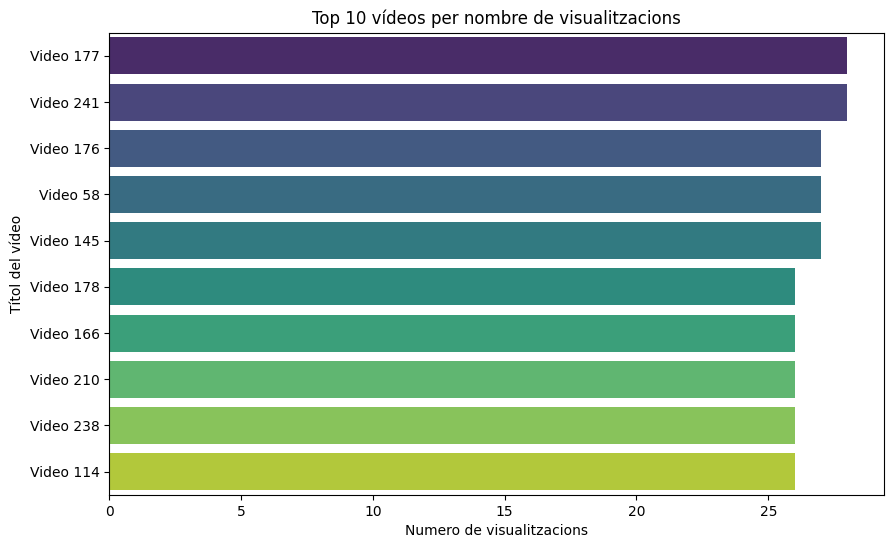

In [11]:
# barplot de los 10 videos mas vistos
# seleccionar la columna 'title' correcta (después del merge puede ser 'title_x' o 'title_y')
if 'title' in views_df.columns:
	title_col = 'title'



top_videos = views_df[title_col].value_counts().nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_videos.values, y=top_videos.index, palette='viridis')
plt.xlabel('Numero de visualitzacions')
plt.ylabel('Títol del vídeo')
plt.title('Top 10 vídeos per nombre de visualitzacions')
plt.show()

Visualització 2: heatmap amb counts per genre vs country (top països).

In [ ]:
# heatmap amb counts per país i gènere
plt.figure(figsize=(12,6))
heatmap_data = views_df.pivot_table(index='gender_x', columns='country_x', values='view_id', aggfunc='count', fill_value=0)
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.xlabel('País')
plt.ylabel('Gènere')
plt.title('Mapa de calor de visualitzacions per país i gènere')
plt.show()

KeyError: 'gender'

<Figure size 1200x600 with 0 Axes>

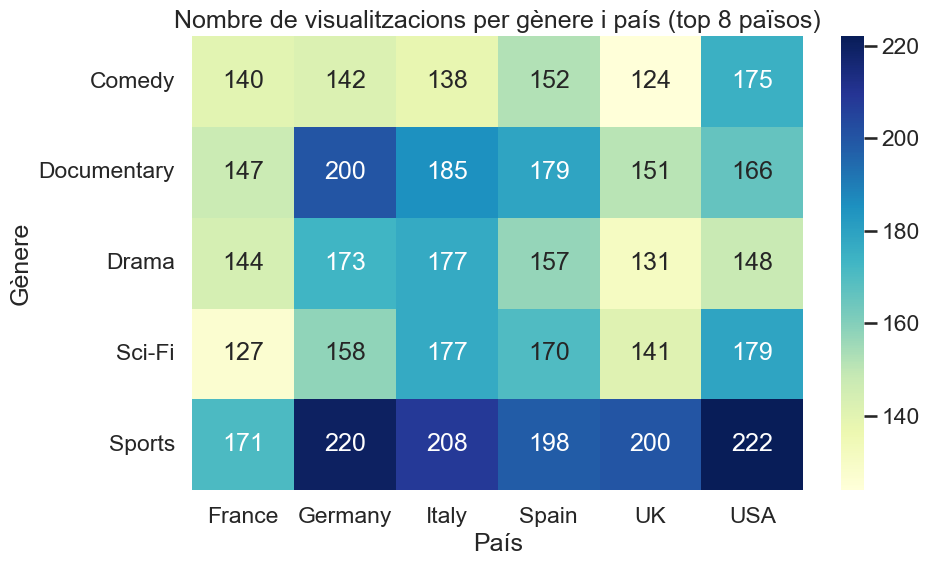

Visualització 3: evolució setmanal d’hores vistes.

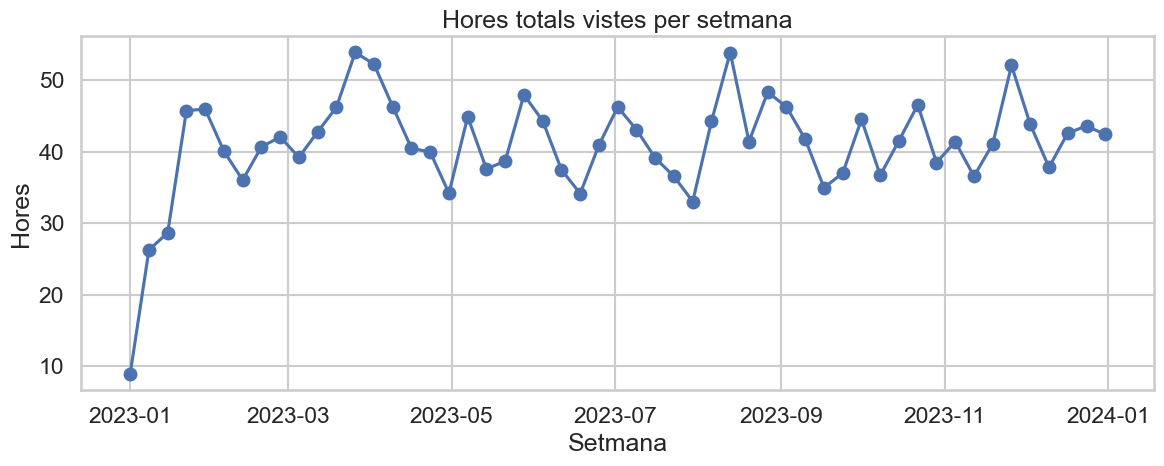

Visualització 4: comparativa watch time mitjà entre subscription types.


Mitjana minuts vist per tipus de subscripció:
   subscription  mean_watch_min
0         free       26.028484
1      premium       26.095160


C:\Users\natxo\AppData\Local\Temp\ipykernel_2800\496290944.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_by_sub, x="subscription", y="mean_watch_min", palette="pastel")


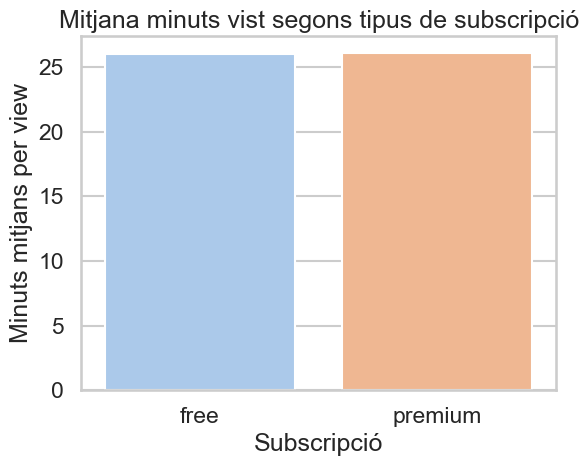

Top 5 vídeos amb major completion_rate (percentatge de views completades).


Top 5 vídeos per taux de completitud:
          title  views_count  completion_rate
24    Video 25           13        46.153846
174  Video 175           13        38.461538
149  Video 150           19        36.842105
0      Video 1           11        36.363636
31    Video 32           14        35.714286
